In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv("/content/new_insurance_data.csv")

In [3]:
df.shape

(1338, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [5]:
df.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066


In [6]:
df.isna().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [7]:
df.isna().sum().sum()

52

In [8]:
#Null values imputation using mean,meadian
for ifc in df.select_dtypes(include="float64").columns:
  if(df[ifc].skew()>0.5):
    df[ifc]=df[ifc].fillna(df[ifc].median())
    print(ifc,'skewed')
  else:
    df[ifc]=df[ifc].fillna(df[ifc].mean())
    print(ifc,'Normal')


age Normal
bmi Normal
children skewed
Claim_Amount Normal
past_consultations Normal
num_of_steps Normal
Hospital_expenditure skewed
NUmber_of_past_hospitalizations Normal
Anual_Salary skewed
charges skewed


age


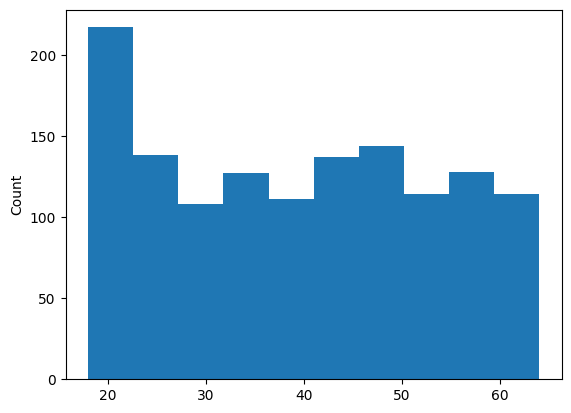

bmi


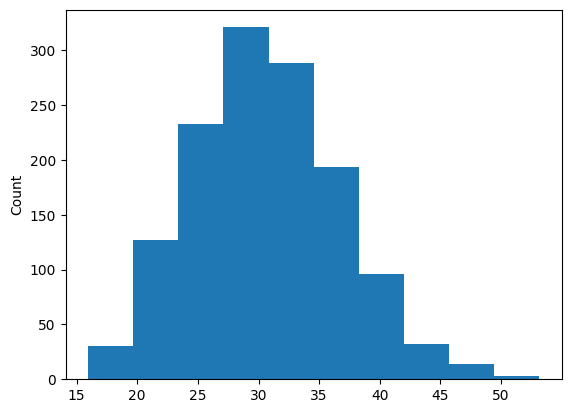

children


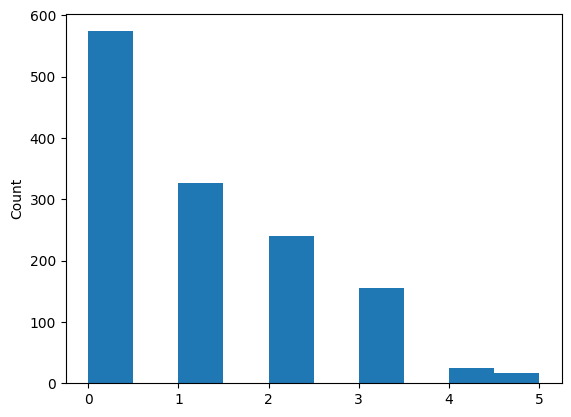

Claim_Amount


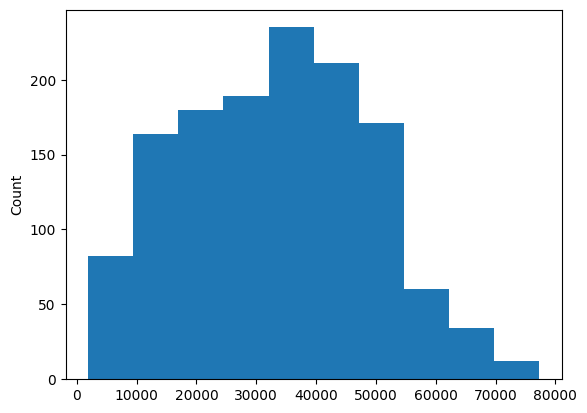

past_consultations


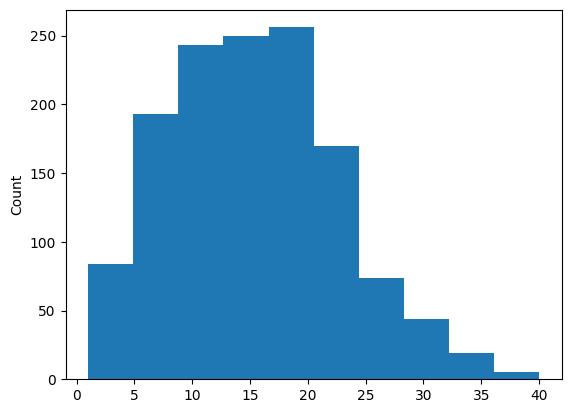

num_of_steps


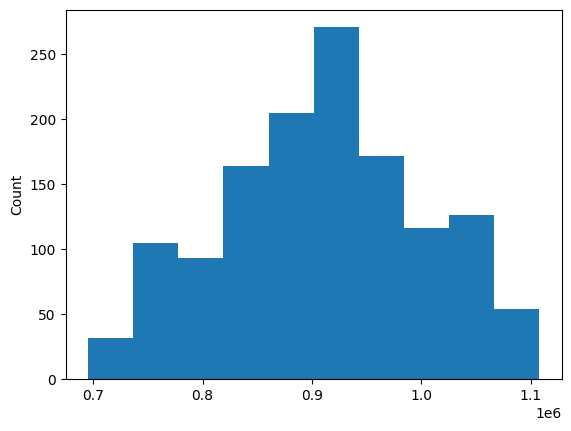

Hospital_expenditure


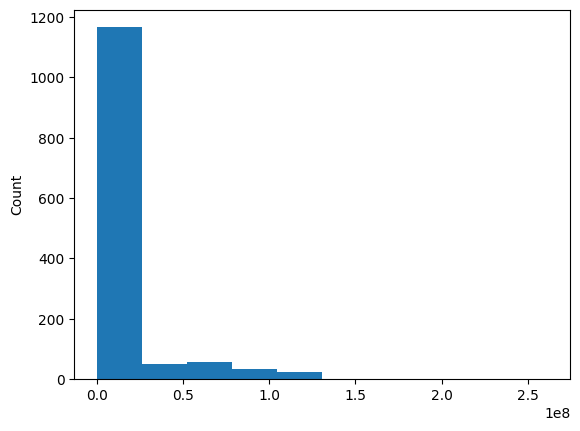

NUmber_of_past_hospitalizations


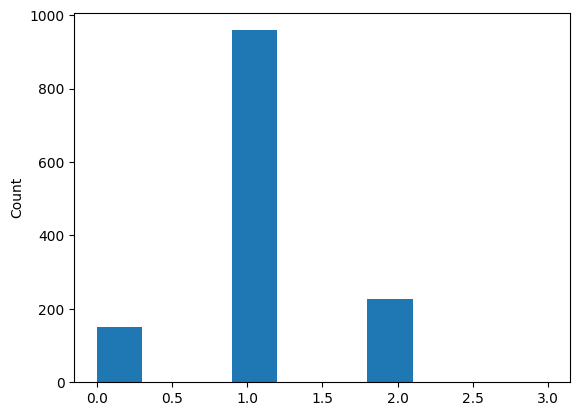

Anual_Salary


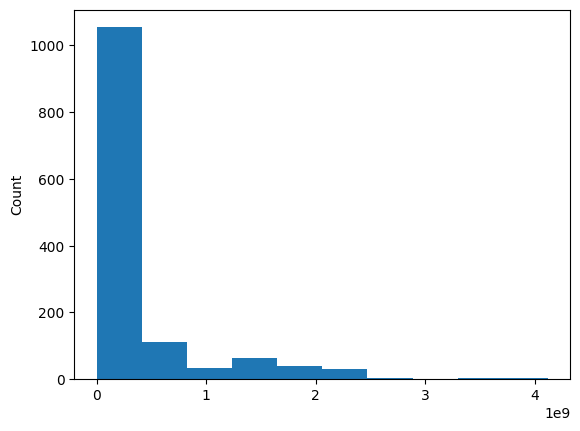

charges


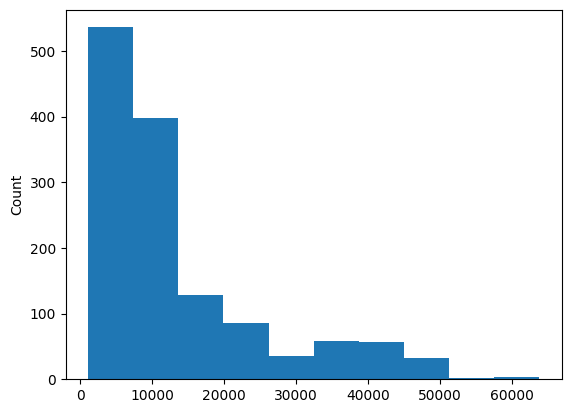

In [9]:
#EDA for univariate anlaysis(single variable)
for i in df.select_dtypes(include="float64").columns:
  print(i)
  plt.hist(df[i])
  plt.ylabel('Count')
  plt.show()

sex


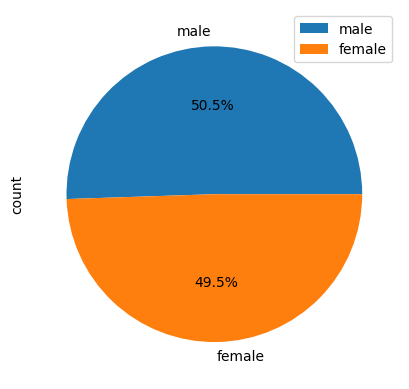

smoker


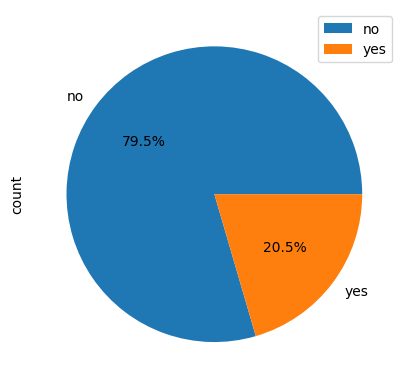

region


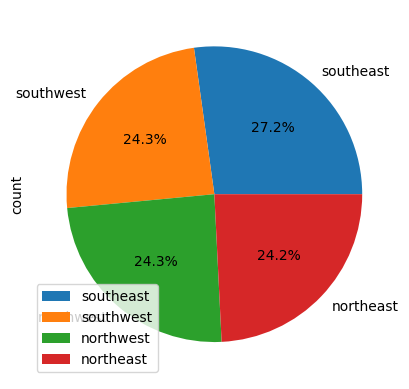

In [10]:
# Univariate analysis for categorical features
for i in df.select_dtypes(include="object").columns:
  print(i)
  df[i].value_counts().plot.pie(autopct='%1.1f%%',legend=True)
  plt.show()

<Axes: >

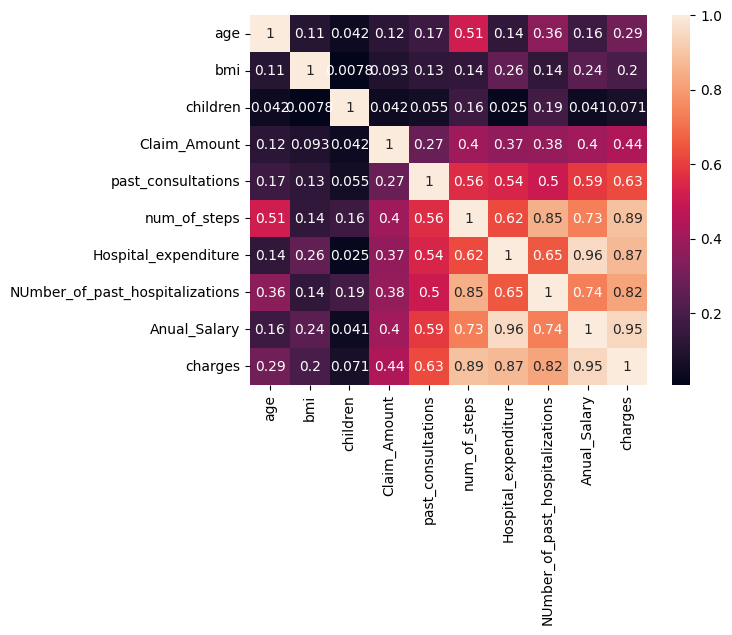

In [11]:
#correation matrix
df_num=df.select_dtypes(include="float64")
sn.heatmap(df_num.corr(),annot=True)

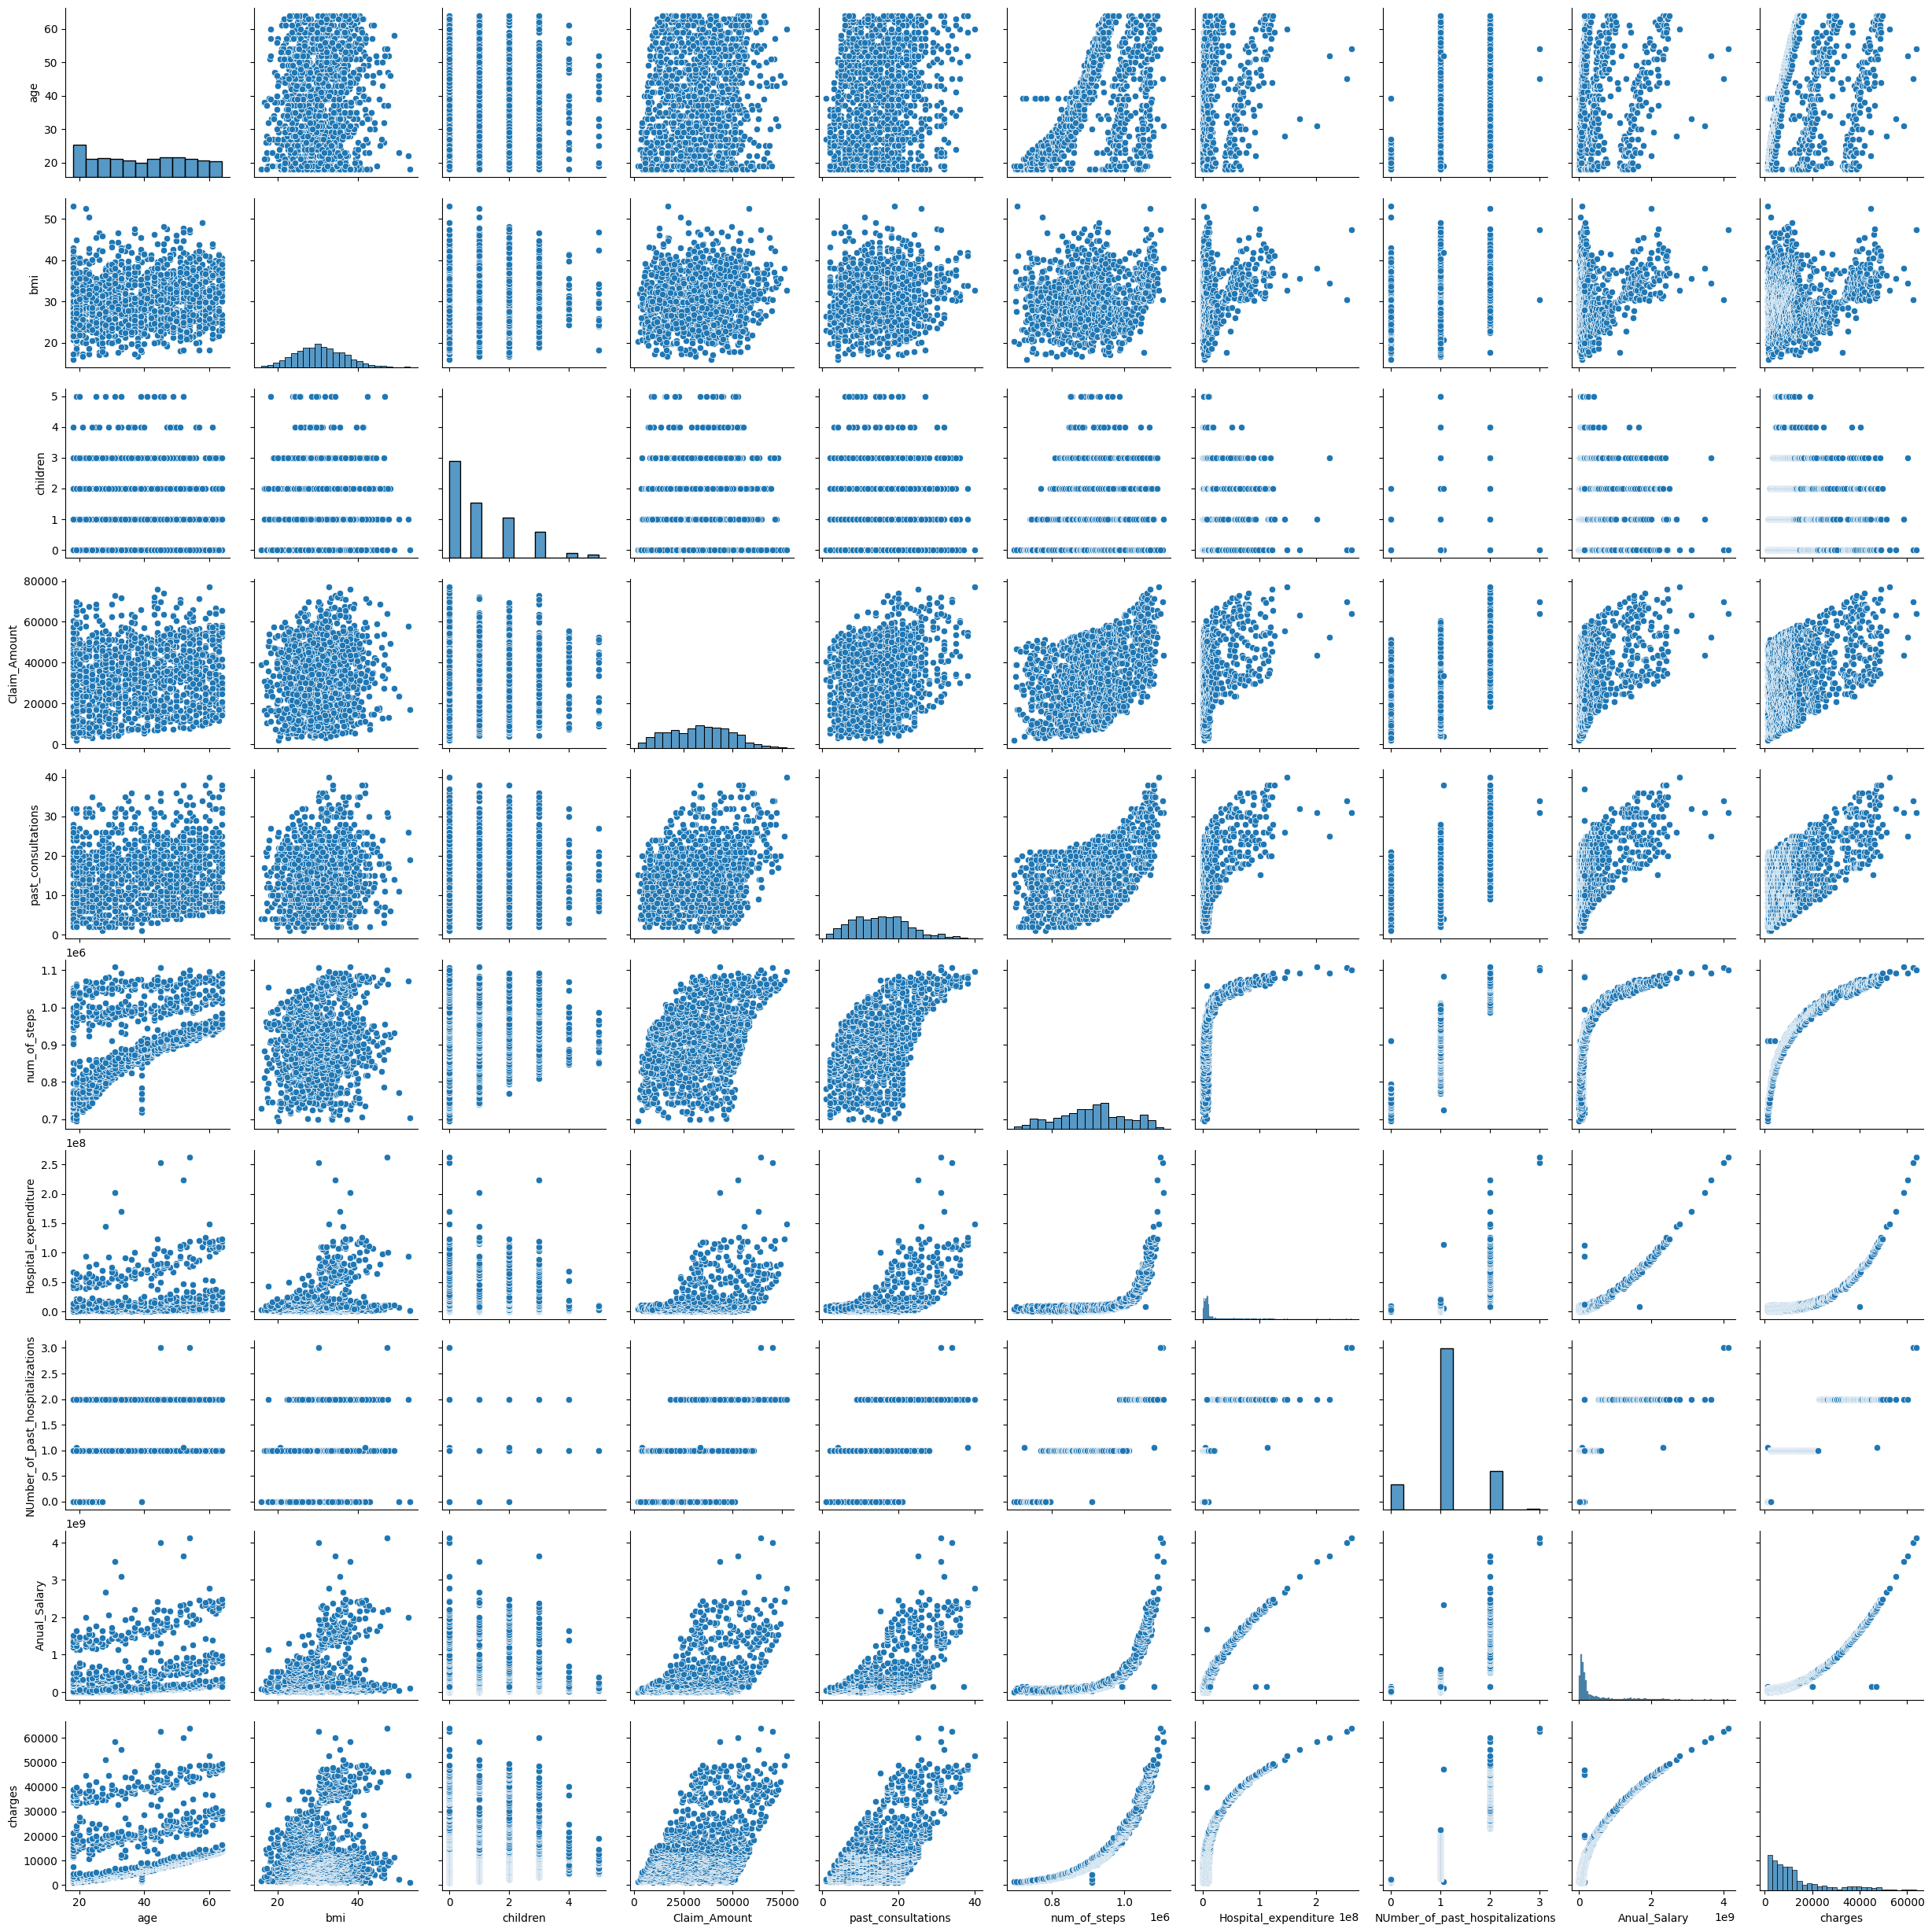

In [12]:
#multivariate analysis
g=sn.pairplot(df)

for ax in g.axes.flat:
  xlabel= ax.get_xlabel()
  ylabel= ax.get_ylabel()

plt.show()

In [13]:
y=df.iloc[:,-1]
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


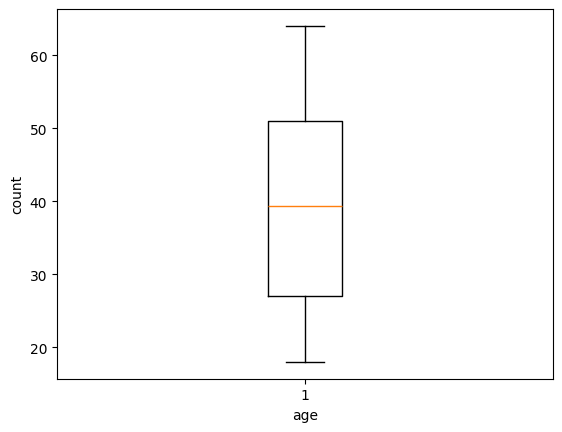

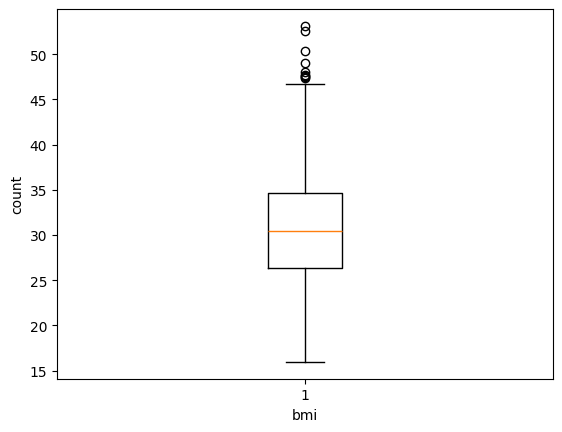

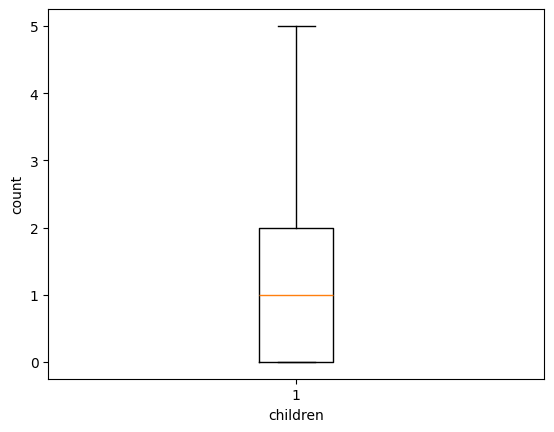

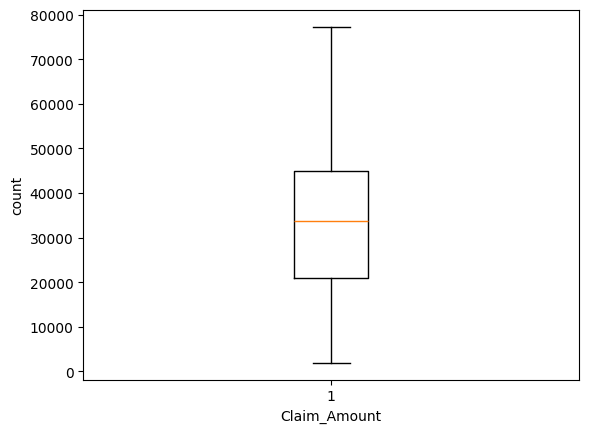

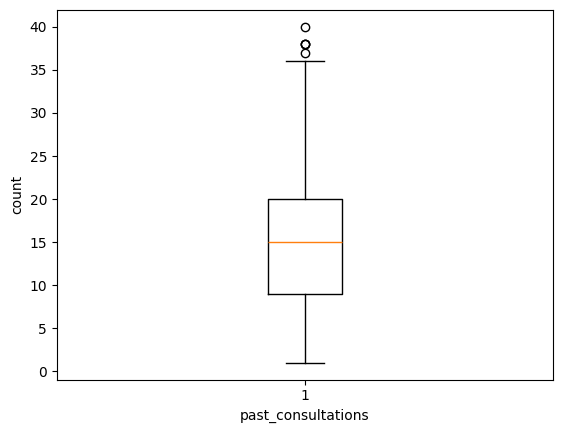

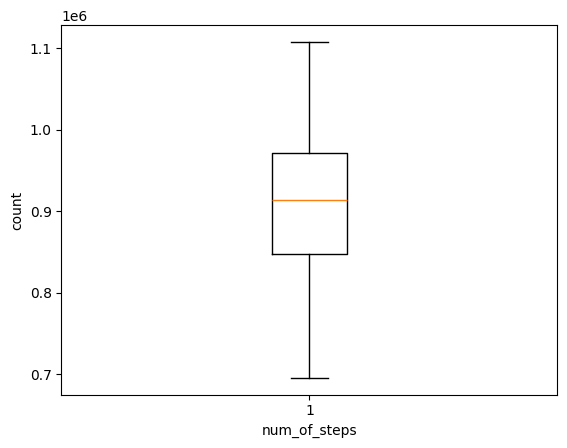

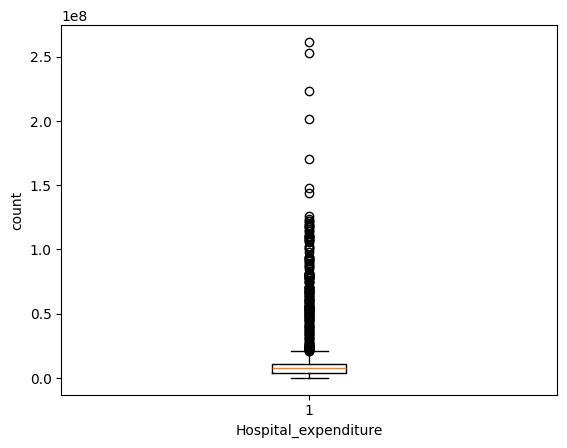

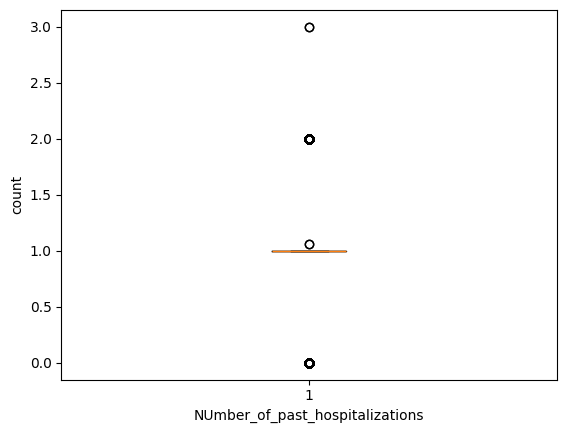

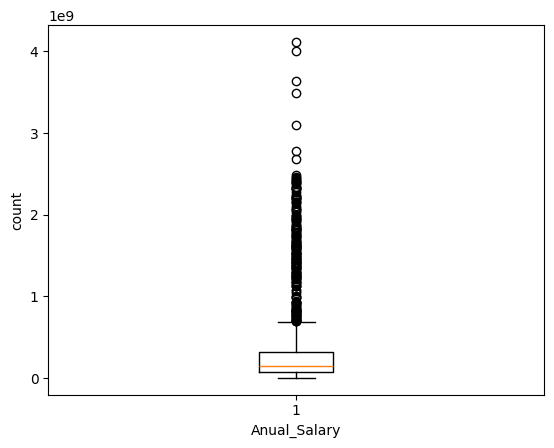

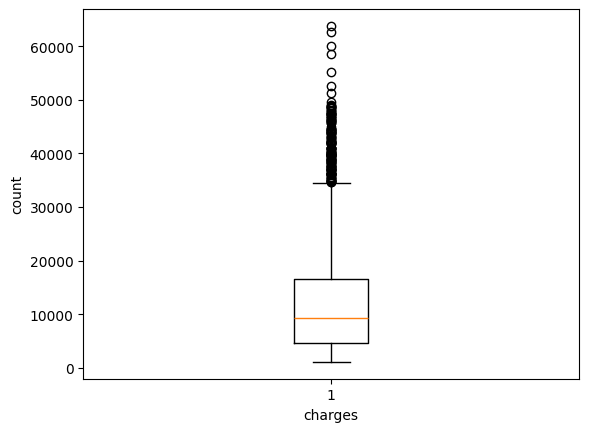

In [14]:
#outlier detection using boxplot
for i in df.select_dtypes(include="float64").columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.ylabel("count")
  plt.show()

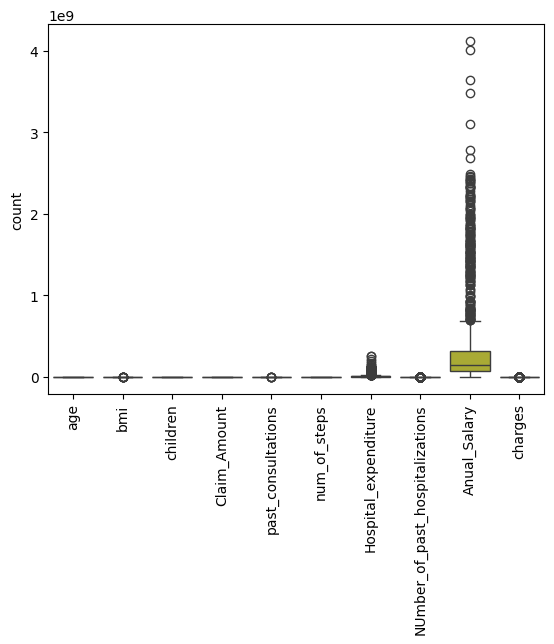

In [15]:
#whole boxplot as one plot
d=df.select_dtypes(include="float64").columns
sn.boxplot(df[d])
plt.xticks(rotation='vertical')
plt.ylabel('count')
plt.show()

In [16]:
#Outlier Reduction Using IQR Analysis
outlier_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for i in outlier_list:

    Q1=df[i].quantile(0.25)  #q1=lower half of median(q2)
    Q3=df[i].quantile(0.75)  #q3=higher half of median
    IQR=Q3-Q1

    df = df[(df[i]> Q1-1.5*IQR) & (df[i]< Q3+1.5*IQR)]

In [17]:
#updated dataset
df.shape

(1030, 13)

In [18]:
df.duplicated().sum()

0

In [19]:
#dropping less significant columns
df=df.drop(['bmi','NUmber_of_past_hospitalizations'],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1069
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1030 non-null   float64
 1   sex                   1030 non-null   object 
 2   children              1030 non-null   float64
 3   smoker                1030 non-null   object 
 4   Claim_Amount          1030 non-null   float64
 5   past_consultations    1030 non-null   float64
 6   num_of_steps          1030 non-null   float64
 7   Hospital_expenditure  1030 non-null   float64
 8   Anual_Salary          1030 non-null   float64
 9   region                1030 non-null   object 
 10  charges               1030 non-null   float64
dtypes: float64(8), object(3)
memory usage: 96.6+ KB


In [21]:
#Multicollinearity with VIF and Feature Selection
#VIF should be less than 1 for better results
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data


,feature,VIF
0,age,13.792519
1,children,1.833335
2,Claim_Amount,5.683286
3,past_consultations,6.249487
4,num_of_steps,26.121303
5,Hospital_expenditure,5.320052
6,Anual_Salary,5.325988


In [22]:
df=df.drop(['age','num_of_steps'],axis=1)

In [23]:
#Multicollinearity with VIF and Feature Selection
#VIF should be less than 1 for better results
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data


,feature,VIF
0,children,1.714400
1,Claim_Amount,4.169418
2,past_consultations,4.671708
3,Hospital_expenditure,4.391913
4,Anual_Salary,4.398658


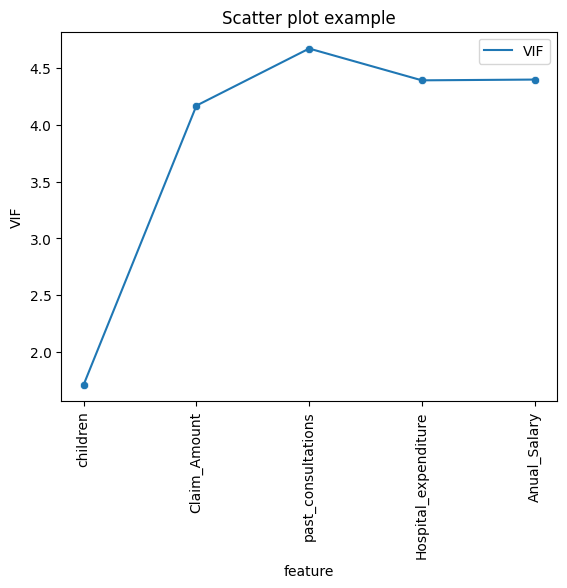

In [24]:
 plt.title('Scatter plot example')
 sn.scatterplot(data=vif_data,x='feature',y='VIF')
 plt.xticks(rotation='vertical')
 sn.lineplot(vif_data)
 plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [26]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,1.419361e+08


In [36]:
y=df.iloc[:,-1]
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [37]:
x.shape

(1030, 5)

In [38]:
y.shape

(1030,)

In [39]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state = 1030)
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
78,0.0,30814.29616,10.0,8.178046e+06,9.826776e+07
362,0.0,47687.44363,22.0,9.782759e+05,8.106529e+07
272,2.0,45727.87465,14.0,2.343557e+06,5.146269e+07
175,1.0,10227.41942,12.0,1.707952e+06,3.025288e+07
988,3.0,34311.81114,25.0,8.430907e+06,3.280802e+08
...,...,...,...,...,...
62,0.0,37498.71981,7.0,1.682983e+06,2.303493e+07
891,0.0,37441.40236,20.0,7.290092e+06,1.743123e+08
333,2.0,37934.04511,17.0,1.078261e+06,5.656139e+07
659,1.0,45755.60925,24.0,1.932605e+06,1.784697e+08


In [40]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
1016,0.0,44462.694820,21.0,1.437146e+07,3.428884e+08
230,1.0,5955.900727,19.0,1.735539e+06,7.503551e+07
523,4.0,7207.221375,9.0,6.904912e+06,7.925366e+07
917,0.0,13890.398080,13.0,1.126507e+07,1.921861e+08
324,0.0,51914.325440,21.0,7.946236e+06,1.150965e+08
...,...,...,...,...,...
627,0.0,49140.254220,10.0,4.776407e+06,9.172299e+07
485,3.0,33741.003880,10.0,1.985637e+06,1.306169e+08
653,0.0,35832.467530,9.0,9.508487e+06,1.208236e+08
896,2.0,27682.727700,14.0,5.233108e+06,1.831434e+08


In [41]:
#Model Building
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [42]:
predictions=l_model.predict(x_test)
predictions

array([18472.51158947,  4851.32862571,  5836.18231845, 10639.96012876,
        7331.63630561,  3617.14740642,  6373.52549818,  9439.35320899,
        7312.30782212, 12547.38362209,  5143.33666297,  3503.41177107,
       12329.95782363, 10320.55216068,  9892.9984156 ,  6021.89197794,
        5625.61669213,  4287.62724001,  2587.39792042,  5369.50085812,
        6902.73701013,  5655.06154989, 13090.86884265, 17395.15812431,
       10287.17004513,  9565.03443488,  5687.00167768,  6384.63495586,
        5994.78887456, 21141.89569626, 13429.44912748,  9665.69492155,
        8848.51938538,  6368.89765984,  5880.96329713,  4423.00254595,
        7925.06128177, 16216.03002759,  5354.09788937,  5522.95471549,
        5364.47564838,  9207.67441837, 15817.27817493,  2776.11991478,
       10908.54167259, 12464.64905552,  6329.61854626,  7482.73667336,
        9276.47543176,  7760.3713885 ,  7544.77735533, 10387.25267169,
       17634.1407152 ,  8359.63318168,  9715.61648083, 18350.04272809,
      

In [43]:
#Accuracy
from sklearn.metrics import *
r2score=r2_score(y_test,predictions)
r2score

0.8248096140723996

In [44]:
#Evaluation Metrics
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 3200229.850175471


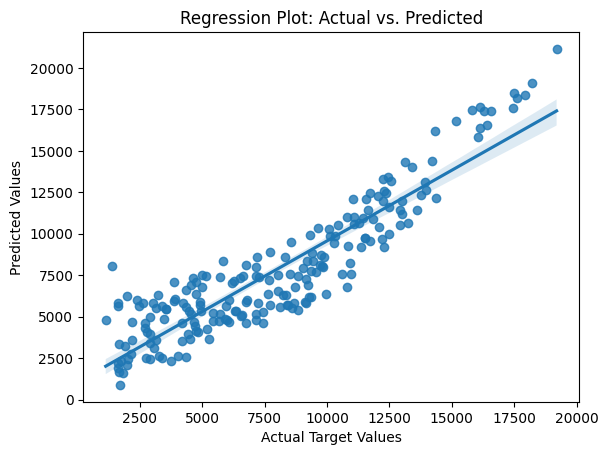

In [46]:
# Create a regression plot
sn.regplot(x=y_test, y=predictions)

# Set plot labels and title
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs. Predicted")

# Display the plot
plt.show()

In [48]:
#Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
gbm_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_reg.fit(x_train, y_train.ravel())

<ipython-input-49-bdc88dea752c>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  gbm_reg.fit(x_train, y_train.ravel())


GradientBoostingRegressor(random_state=42)

In [50]:
# Make predictions
y_train_pred = gbm_reg.predict(x_train)
y_test_pred = gbm_reg.predict(x_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print(f"Training R²: {r2_train:.2f}")
print(f"Testing R²: {r2_test:.2f}")
print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")

Training R²: 0.92
Testing R²: 0.84
Training MSE: 1504971.65
Testing MSE: 2980364.42
Training RMSE: 1226.77
Testing RMSE: 1726.37


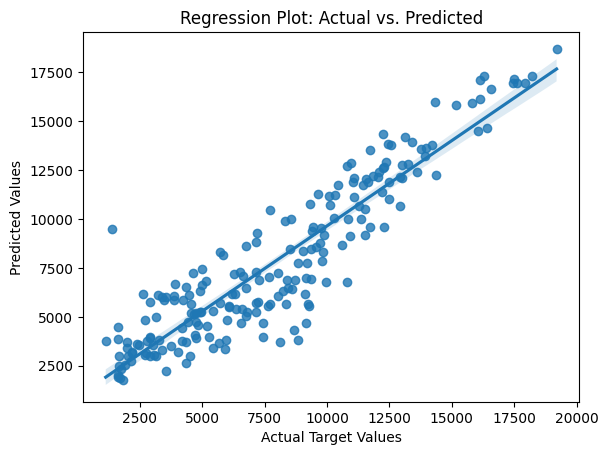

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot
sns.regplot(x=y_test, y=y_test_pred)

# Set plot labels and title
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs. Predicted")

# Display the plot
plt.show()